# Multilayer networks with Keras 


We will use a few functions from [`scikit-learn`](http://scikit-learn.org) to generate data sets:

In [1]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from utils import generate_dataset

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

We'll also set up some configuration variables up-front:

### The first example is a linearly separable data-set:

In [3]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_blobs, 
                                                                    n_train=1000, 
                                                                    n_test=200, 
                                                                    num_labels=2,
                                                                    centers=2, 
                                                                    center_box=[-4., 4.])

In [4]:
train_data.shape, train_labels.shape

((1000, 2), (1000, 2))

In [5]:
train_data[:10]

array([[ 4.814732 ,  1.7407084],
       [ 3.7225633,  3.621447 ],
       [ 2.2073178, -4.1198587],
       [ 5.390679 ,  1.4861131],
       [ 3.4678643, -4.344579 ],
       [ 1.987642 ,  2.4759314],
       [ 2.9201686, -3.1482089],
       [ 5.225619 , -4.6474214],
       [ 4.0107203,  1.5775446],
       [ 3.0635386, -5.103394 ]], dtype=float32)

In [6]:
train_labels[:10]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

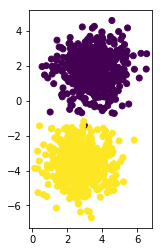

In [7]:
fig, ax = plt.subplots(1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=np.where(train_labels)[1])
ax.set_aspect('equal')

In [8]:
from keras.models import Sequential
from keras.layers import Dense

/Users/arokem/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(Dense(32, input_shape=(train_data.shape[-1],), activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## An aside about the softmax function 

The softmax function defined mathemtatically as: 

$f(y_i) = \frac{e^{y_i}}{\sum_i{e^{y_i}}}$

assigns each of the possible outputs a probability (a number between 0-1, all sum together to 1). 

It also has the effect of 'mutual inhibition' between alternative options. 

Consider our case, with two options:


In [10]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [11]:
output = []
xs = np.arange(1, 11, 1)
for ii in xs:
    x = [10-ii, ii]
    output.append(softmax(x))

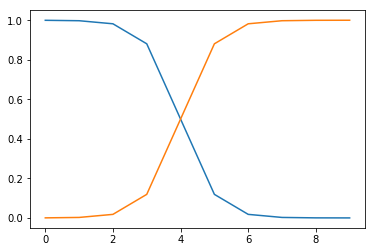

In [12]:
plt.plot(output)

In [13]:
model.fit(train_data, train_labels, epochs=5, batch_size=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 427us/step - loss: 0.2505 - acc: 0.9975 - val_loss: 0.2202 - val_acc: 1.0000
Epoch 2/5
800/800 [==============================] - 0s 184us/step - loss: 0.2029 - acc: 0.9975 - val_loss: 0.1854 - val_acc: 1.0000
Epoch 3/5
800/800 [==============================] - 0s 22us/step - loss: 0.1729 - acc: 0.9975 - val_loss: 0.1587 - val_acc: 1.0000
Epoch 4/5
800/800 [==============================] - 0s 25us/step - loss: 0.1490 - acc: 0.9975 - val_loss: 0.1367 - val_acc: 1.0000
Epoch 5/5
800/800 [==============================] - 0s 35us/step - loss: 0.1289 - acc: 0.9975 - val_loss: 0.1175 - val_acc: 1.0000


In [14]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)

200/200 [==============================] - 0s 33us/step


In [15]:
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

loss : 0.10733985900878906
acc : 0.9950000047683716


In [16]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

In [17]:
prediction

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1,

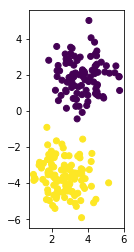

In [18]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=np.where(prediction)[1])
ax.set_aspect('equal')



### The next set of data is not linearly separable:

In [19]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_moons, 
                                                                    n_train=1000, 
                                                                    n_test=200,
                                                                    num_labels=2, 
                                                                    noise=0.2)

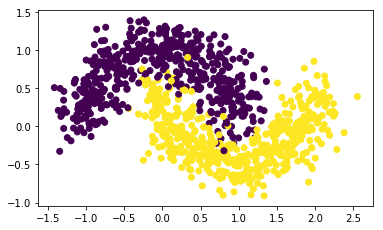

In [20]:
fig, ax = plt.subplots(1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=np.where(train_labels)[1])
ax.set_aspect('equal')

In [21]:
model.fit(train_data, train_labels, nb_epoch=5, batch_size=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 27us/step - loss: 0.6139 - acc: 0.6800 - val_loss: 0.6057 - val_acc: 0.6800
Epoch 2/5
800/800 [==============================] - 0s 27us/step - loss: 0.5704 - acc: 0.7450 - val_loss: 0.5678 - val_acc: 0.7450
Epoch 3/5
800/800 [==============================] - 0s 47us/step - loss: 0.5369 - acc: 0.8087 - val_loss: 0.5357 - val_acc: 0.7900
Epoch 4/5
800/800 [==============================] - 0s 39us/step - loss: 0.5074 - acc: 0.8400 - val_loss: 0.5067 - val_acc: 0.8200
Epoch 5/5
800/800 [==============================] - 0s 34us/step - loss: 0.4806 - acc: 0.8488 - val_loss: 0.4802 - val_acc: 0.8350


/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [22]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

200/200 [==============================] - 0s 58us/step

loss : 0.4658791124820709
acc : 0.875


In [23]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

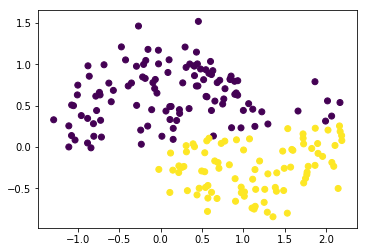

In [24]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=np.where(prediction)[1])
ax.set_aspect('equal')

In [25]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_circles, 
                                                                    n_train=1000,
                                                                    n_test=200, 
                                                                    noise=0.2, 
                                                                    num_labels=2,
                                                                    factor=0.1)

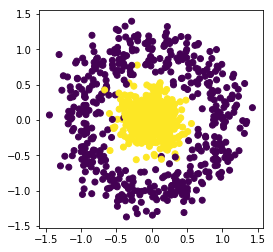

In [26]:
fig, ax = plt.subplots(1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=np.where(train_labels)[1])
ax.set_aspect('equal')

In [27]:
model.fit(train_data, train_labels, nb_epoch=5, batch_size=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 26us/step - loss: 0.7325 - acc: 0.5050 - val_loss: 0.7419 - val_acc: 0.4650
Epoch 2/5
800/800 [==============================] - 0s 28us/step - loss: 0.7153 - acc: 0.5187 - val_loss: 0.7243 - val_acc: 0.4900
Epoch 3/5
800/800 [==============================] - 0s 25us/step - loss: 0.7002 - acc: 0.5313 - val_loss: 0.7088 - val_acc: 0.5100
Epoch 4/5
800/800 [==============================] - 0s 59us/step - loss: 0.6861 - acc: 0.5450 - val_loss: 0.6941 - val_acc: 0.5300
Epoch 5/5
800/800 [==============================] - 0s 46us/step - loss: 0.6723 - acc: 0.5650 - val_loss: 0.6796 - val_acc: 0.5600


/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [28]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

200/200 [==============================] - 0s 108us/step

loss : 0.7114527821540833
acc : 0.48000000417232513


In [29]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

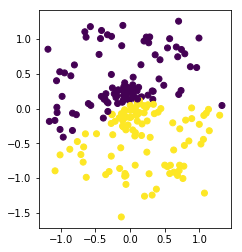

In [30]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=np.where(prediction)[1])
ax.set_aspect('equal')

In [31]:
model = Sequential()
model.add(Dense(32, input_shape=(train_data.shape[-1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [32]:
model.fit(train_data, train_labels, epochs=5, batch_size=100, validation_split=0.2)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 486us/step - loss: 0.6816 - acc: 0.5662 - val_loss: 0.6589 - val_acc: 0.7000
Epoch 2/5
800/800 [==============================] - 0s 42us/step - loss: 0.6400 - acc: 0.7662 - val_loss: 0.6244 - val_acc: 0.8300
Epoch 3/5
800/800 [==============================] - 0s 45us/step - loss: 0.6053 - acc: 0.8375 - val_loss: 0.5920 - val_acc: 0.8450
Epoch 4/5
800/800 [==============================] - 0s 54us/step - loss: 0.5726 - acc: 0.8588 - val_loss: 0.5600 - val_acc: 0.8950
Epoch 5/5
800/800 [==============================] - 0s 65us/step - loss: 0.5405 - acc: 0.8800 - val_loss: 0.5281 - val_acc: 0.9150

200/200 [==============================] - 0s 76us/step

loss : 0.5188497006893158
acc : 0.8849999904632568


In [33]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

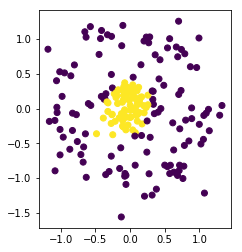

In [34]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=np.where(prediction)[1])
ax.set_aspect('equal')